In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from pathlib import Path

# Optional: for interactive visualizations
import plotly.express as px
import plotly.graph_objects as go

In [3]:
DATA_DIR = Path('dataset')
INSTRS = ['BTC'] #, 'ETH', 'ADA']
CSV_MAP = {ins: DATA_DIR / f"{ins}_5min.csv" for ins in INSTRS}

dfs = {}
for ins in INSTRS:
    path = CSV_MAP[ins]
    if path.exists():
        print(f'Loading {ins} from {path}')
        df = pd.read_csv(path)
        time_col = 'system_time' if 'system_time' in df.columns else df.columns[0]
        df['timestamp'] = pd.to_datetime(df[time_col])
        df['timestamp'] = df['timestamp'].dt.round('T')
        df = df.sort_values('timestamp')
        dfs[ins] = df
    else:
        print(f'⚠️ File not found: {path} — skipping.')
print(f"Loaded {len(dfs)} instruments: {list(dfs.keys())}")
for ins, df in dfs.items():
    print(f"{ins}: {df.shape[0]} rows, {df.shape[1]} columns")
    display(df.head(3))

Loading BTC from dataset/BTC_5min.csv
Loaded 1 instruments: ['BTC']
BTC: 3367 rows, 157 columns


/var/folders/fs/1b5sy3xs1_50rf2v8vnv0s9c0000gn/T/ipykernel_25451/1204716857.py:13: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df['timestamp'] = df['timestamp'].dt.round('T')


,Unnamed: 0,system_time,midpoint,spread,buys,sells,bids_distance_0,bids_distance_1,bids_distance_2,bids_distance_3,...,asks_market_notional_6,asks_market_notional_7,asks_market_notional_8,asks_market_notional_9,asks_market_notional_10,asks_market_notional_11,asks_market_notional_12,asks_market_notional_13,asks_market_notional_14,timestamp
0,0,2021-04-07 11:37:41.122161+00:00,55899.995,0.01,1.199304e+07,1.348616e+07,-8.944544e-08,-1.294276e-04,-0.000130,-0.000143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-04-07 11:38:00+00:00
1,1,2021-04-07 11:42:41.122161+00:00,56111.655,0.01,1.029537e+07,5.020347e+06,-8.910805e-08,-1.011376e-04,-0.000207,-0.000208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-04-07 11:43:00+00:00
2,2,2021-04-07 11:47:41.122161+00:00,56100.015,0.01,3.825363e+06,4.640026e+06,-8.912654e-08,-2.673796e-07,-0.000384,-0.000410,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-04-07 11:48:00+00:00


In [4]:
print(df.columns.to_list())

['Unnamed: 0', 'system_time', 'midpoint', 'spread', 'buys', 'sells', 'bids_distance_0', 'bids_distance_1', 'bids_distance_2', 'bids_distance_3', 'bids_distance_4', 'bids_distance_5', 'bids_distance_6', 'bids_distance_7', 'bids_distance_8', 'bids_distance_9', 'bids_distance_10', 'bids_distance_11', 'bids_distance_12', 'bids_distance_13', 'bids_distance_14', 'bids_notional_0', 'bids_notional_1', 'bids_notional_2', 'bids_notional_3', 'bids_notional_4', 'bids_notional_5', 'bids_notional_6', 'bids_notional_7', 'bids_notional_8', 'bids_notional_9', 'bids_notional_10', 'bids_notional_11', 'bids_notional_12', 'bids_notional_13', 'bids_notional_14', 'bids_cancel_notional_0', 'bids_cancel_notional_1', 'bids_cancel_notional_2', 'bids_cancel_notional_3', 'bids_cancel_notional_4', 'bids_cancel_notional_5', 'bids_cancel_notional_6', 'bids_cancel_notional_7', 'bids_cancel_notional_8', 'bids_cancel_notional_9', 'bids_cancel_notional_10', 'bids_cancel_notional_11', 'bids_cancel_notional_12', 'bids_canc

### BTC_5min.csv Data Dictionary

This document provides an English description of all columns in BTC_5min.csv, grouped by category.

#### 1️⃣ Time Information
- `system_time`: Exact system time of data recording
- `timestamp`: Rounded timestamp used for analysis (`pd.to_datetime(df['system_time']).dt.round('T')`)

#### 2️⃣ Price Information
- `midpoint`: Midpoint price between best bid and best ask
- `spread`: Difference between best bid and best ask

#### 3️⃣ Trade Activity
- `buys`: Number of executed buy trades in this interval
- `sells`: Number of executed sell trades in this interval

#### 4️⃣ Bid Book Distances (from midpoint)
- `bids_distance_0`: Distance of bid level 0 from the midpoint in %
- `bids_distance_1`: Distance of bid level 1 from the midpoint in %
- `bids_distance_2`: Distance of bid level 2 from the midpoint in %
- `bids_distance_3`: Distance of bid level 3 from the midpoint in %
- `bids_distance_4`: Distance of bid level 4 from the midpoint in %
- `bids_distance_5`: Distance of bid level 5 from the midpoint in %
- `bids_distance_6`: Distance of bid level 6 from the midpoint in %
- `bids_distance_7`: Distance of bid level 7 from the midpoint in %
- `bids_distance_8`: Distance of bid level 8 from the midpoint in %
- `bids_distance_9`: Distance of bid level 9 from the midpoint in %
- `bids_distance_10`: Distance of bid level 10 from the midpoint in %
- `bids_distance_11`: Distance of bid level 11 from the midpoint in %
- `bids_distance_12`: Distance of bid level 12 from the midpoint in %
- `bids_distance_13`: Distance of bid level 13 from the midpoint in %
- `bids_distance_14`: Distance of bid level 14 from the midpoint in %

#### 5️⃣ Bid Notional Volumes
- `bids_notional_0`: Total notional amount at bid level 0
- `bids_notional_1`: Total notional amount at bid level 1
- `bids_notional_2`: Total notional amount at bid level 2
- `bids_notional_3`: Total notional amount at bid level 3
- `bids_notional_4`: Total notional amount at bid level 4
- `bids_notional_5`: Total notional amount at bid level 5
- `bids_notional_6`: Total notional amount at bid level 6
- `bids_notional_7`: Total notional amount at bid level 7
- `bids_notional_8`: Total notional amount at bid level 8
- `bids_notional_9`: Total notional amount at bid level 9
- `bids_notional_10`: Total notional amount at bid level 10
- `bids_notional_11`: Total notional amount at bid level 11
- `bids_notional_12`: Total notional amount at bid level 12
- `bids_notional_13`: Total notional amount at bid level 13
- `bids_notional_14`: Total notional amount at bid level 14
- `bids_cancel_notional_0`: Notional of cancelled orders at bid level 0
- `bids_cancel_notional_1`: Notional of cancelled orders at bid level 1
- `bids_cancel_notional_2`: Notional of cancelled orders at bid level 2
- `bids_cancel_notional_3`: Notional of cancelled orders at bid level 3
- `bids_cancel_notional_4`: Notional of cancelled orders at bid level 4
- `bids_cancel_notional_5`: Notional of cancelled orders at bid level 5
- `bids_cancel_notional_6`: Notional of cancelled orders at bid level 6
- `bids_cancel_notional_7`: Notional of cancelled orders at bid level 7
- `bids_cancel_notional_8`: Notional of cancelled orders at bid level 8
- `bids_cancel_notional_9`: Notional of cancelled orders at bid level 9
- `bids_cancel_notional_10`: Notional of cancelled orders at bid level 10
- `bids_cancel_notional_11`: Notional of cancelled orders at bid level 11
- `bids_cancel_notional_12`: Notional of cancelled orders at bid level 12
- `bids_cancel_notional_13`: Notional of cancelled orders at bid level 13
- `bids_cancel_notional_14`: Notional of cancelled orders at bid level 14
- `bids_limit_notional_0`: Notional of limit orders at bid level 0
- `bids_limit_notional_1`: Notional of limit orders at bid level 1
- `bids_limit_notional_2`: Notional of limit orders at bid level 2
- `bids_limit_notional_3`: Notional of limit orders at bid level 3
- `bids_limit_notional_4`: Notional of limit orders at bid level 4
- `bids_limit_notional_5`: Notional of limit orders at bid level 5
- `bids_limit_notional_6`: Notional of limit orders at bid level 6
- `bids_limit_notional_7`: Notional of limit orders at bid level 7
- `bids_limit_notional_8`: Notional of limit orders at bid level 8
- `bids_limit_notional_9`: Notional of limit orders at bid level 9
- `bids_limit_notional_10`: Notional of limit orders at bid level 10
- `bids_limit_notional_11`: Notional of limit orders at bid level 11
- `bids_limit_notional_12`: Notional of limit orders at bid level 12
- `bids_limit_notional_13`: Notional of limit orders at bid level 13
- `bids_limit_notional_14`: Notional of limit orders at bid level 14
- `bids_market_notional_0`: Notional of market orders at bid level 0
- `bids_market_notional_1`: Notional of market orders at bid level 1
- `bids_market_notional_2`: Notional of market orders at bid level 2
- `bids_market_notional_3`: Notional of market orders at bid level 3
- `bids_market_notional_4`: Notional of market orders at bid level 4
- `bids_market_notional_5`: Notional of market orders at bid level 5
- `bids_market_notional_6`: Notional of market orders at bid level 6
- `bids_market_notional_7`: Notional of market orders at bid level 7
- `bids_market_notional_8`: Notional of market orders at bid level 8
- `bids_market_notional_9`: Notional of market orders at bid level 9
- `bids_market_notional_10`: Notional of market orders at bid level 10
- `bids_market_notional_11`: Notional of market orders at bid level 11
- `bids_market_notional_12`: Notional of market orders at bid level 12
- `bids_market_notional_13`: Notional of market orders at bid level 13
- `bids_market_notional_14`: Notional of market orders at bid level 14

#### 6️⃣ Ask Book Distances (from midpoint)
- `asks_distance_0`: Distance of ask level 0 from the midpoint in %
- `asks_distance_1`: Distance of ask level 1 from the midpoint in %
- `asks_distance_2`: Distance of ask level 2 from the midpoint in %
- `asks_distance_3`: Distance of ask level 3 from the midpoint in %
- `asks_distance_4`: Distance of ask level 4 from the midpoint in %
- `asks_distance_5`: Distance of ask level 5 from the midpoint in %
- `asks_distance_6`: Distance of ask level 6 from the midpoint in %
- `asks_distance_7`: Distance of ask level 7 from the midpoint in %
- `asks_distance_8`: Distance of ask level 8 from the midpoint in %
- `asks_distance_9`: Distance of ask level 9 from the midpoint in %
- `asks_distance_10`: Distance of ask level 10 from the midpoint in %
- `asks_distance_11`: Distance of ask level 11 from the midpoint in %
- `asks_distance_12`: Distance of ask level 12 from the midpoint in %
- `asks_distance_13`: Distance of ask level 13 from the midpoint in %
- `asks_distance_14`: Distance of ask level 14 from the midpoint in %

#### 7️⃣ Ask Notional Volumes
- `asks_notional_0`: Total notional amount at ask level 0
- `asks_notional_1`: Total notional amount at ask level 1
- `asks_notional_2`: Total notional amount at ask level 2
- `asks_notional_3`: Total notional amount at ask level 3
- `asks_notional_4`: Total notional amount at ask level 4
- `asks_notional_5`: Total notional amount at ask level 5
- `asks_notional_6`: Total notional amount at ask level 6
- `asks_notional_7`: Total notional amount at ask level 7
- `asks_notional_8`: Total notional amount at ask level 8
- `asks_notional_9`: Total notional amount at ask level 9
- `asks_notional_10`: Total notional amount at ask level 10
- `asks_notional_11`: Total notional amount at ask level 11
- `asks_notional_12`: Total notional amount at ask level 12
- `asks_notional_13`: Total notional amount at ask level 13
- `asks_notional_14`: Total notional amount at ask level 14
- `asks_cancel_notional_0`: Notional of cancelled orders at ask level 0
- `asks_cancel_notional_1`: Notional of cancelled orders at ask level 1
- `asks_cancel_notional_2`: Notional of cancelled orders at ask level 2
- `asks_cancel_notional_3`: Notional of cancelled orders at ask level 3
- `asks_cancel_notional_4`: Notional of cancelled orders at ask level 4
- `asks_cancel_notional_5`: Notional of cancelled orders at ask level 5
- `asks_cancel_notional_6`: Notional of cancelled orders at ask level 6
- `asks_cancel_notional_7`: Notional of cancelled orders at ask level 7
- `asks_cancel_notional_8`: Notional of cancelled orders at ask level 8
- `asks_cancel_notional_9`: Notional of cancelled orders at ask level 9
- `asks_cancel_notional_10`: Notional of cancelled orders at ask level 10
- `asks_cancel_notional_11`: Notional of cancelled orders at ask level 11
- `asks_cancel_notional_12`: Notional of cancelled orders at ask level 12
- `asks_cancel_notional_13`: Notional of cancelled orders at ask level 13
- `asks_cancel_notional_14`: Notional of cancelled orders at ask level 14
- `asks_limit_notional_0`: Notional of limit orders at ask level 0
- `asks_limit_notional_1`: Notional of limit orders at ask level 1
- `asks_limit_notional_2`: Notional of limit orders at ask level 2
- `asks_limit_notional_3`: Notional of limit orders at ask level 3
- `asks_limit_notional_4`: Notional of limit orders at ask level 4
- `asks_limit_notional_5`: Notional of limit orders at ask level 5
- `asks_limit_notional_6`: Notional of limit orders at ask level 6
- `asks_limit_notional_7`: Notional of limit orders at ask level 7
- `asks_limit_notional_8`: Notional of limit orders at ask level 8
- `asks_limit_notional_9`: Notional of limit orders at ask level 9
- `asks_limit_notional_10`: Notional of limit orders at ask level 10
- `asks_limit_notional_11`: Notional of limit orders at ask level 11
- `asks_limit_notional_12`: Notional of limit orders at ask level 12
- `asks_limit_notional_13`: Notional of limit orders at ask level 13
- `asks_limit_notional_14`: Notional of limit orders at ask level 14
- `asks_market_notional_0`: Notional of market orders at ask level 0
- `asks_market_notional_1`: Notional of market orders at ask level 1
- `asks_market_notional_2`: Notional of market orders at ask level 2
- `asks_market_notional_3`: Notional of market orders at ask level 3
- `asks_market_notional_4`: Notional of market orders at ask level 4
- `asks_market_notional_5`: Notional of market orders at ask level 5
- `asks_market_notional_6`: Notional of market orders at ask level 6
- `asks_market_notional_7`: Notional of market orders at ask level 7
- `asks_market_notional_8`: Notional of market orders at ask level 8
- `asks_market_notional_9`: Notional of market orders at ask level 9
- `asks_market_notional_10`: Notional of market orders at ask level 10
- `asks_market_notional_11`: Notional of market orders at ask level 11
- `asks_market_notional_12`: Notional of market orders at ask level 12
- `asks_market_notional_13`: Notional of market orders at ask level 13
- `asks_market_notional_14`: Notional of market orders at ask level 14

In [5]:
df.head(3).transpose()

,0,1,2
Unnamed: 0,0,1,2
system_time,2021-04-07 11:37:41.122161+00:00,2021-04-07 11:42:41.122161+00:00,2021-04-07 11:47:41.122161+00:00
midpoint,55899.995,56111.655,56100.015
spread,0.01,0.01,0.01
buys,11993042.137718,10295373.52559,3825363.056192
...,...,...,...
asks_market_notional_11,0.0,0.0,0.0
asks_market_notional_12,0.0,0.0,0.0
asks_market_notional_13,0.0,0.0,0.0
asks_market_notional_14,0.0,0.0,0.0


In [6]:
pd.set_option('display.max_rows', None)
transposed_df = df.set_index('timestamp').head(3).transpose()
display(transposed_df)

timestamp,2021-04-07 11:38:00+00:00,2021-04-07 11:43:00+00:00,2021-04-07 11:48:00+00:00
Unnamed: 0,0,1,2
system_time,2021-04-07 11:37:41.122161+00:00,2021-04-07 11:42:41.122161+00:00,2021-04-07 11:47:41.122161+00:00
midpoint,55899.995,56111.655,56100.015
spread,0.01,0.01,0.01
buys,11993042.137718,10295373.52559,3825363.056192
sells,13486155.647609,5020347.279235,4640025.74752
bids_distance_0,-0.0,-0.0,-0.0
bids_distance_1,-0.000129,-0.000101,-0.0
bids_distance_2,-0.00013,-0.000207,-0.000384
bids_distance_3,-0.000143,-0.000208,-0.00041


In [7]:
transposed_df[transposed_df.index.str.endswith('_0')]

timestamp,2021-04-07 11:38:00+00:00,2021-04-07 11:43:00+00:00,2021-04-07 11:48:00+00:00
bids_distance_0,-0.0,-0.0,-0.0
bids_notional_0,18997.929688,8416.75,2.7
bids_cancel_notional_0,1309.910034,0.0,19769.929688
bids_limit_notional_0,20307.839844,8416.75,20956.339844
bids_market_notional_0,0.0,0.0,1183.709961
asks_distance_0,0.0,0.0,0.0
asks_notional_0,1098659.25,21074.419922,68516.4375
asks_cancel_notional_0,1107645.375,77995.210938,56100.019531
asks_limit_notional_0,2208291.0,99069.617188,124855.078125
asks_market_notional_0,1986.449951,0.0,238.630005


In [8]:
btc = df.set_index('timestamp')
btc.head(3)

,Unnamed: 0,system_time,midpoint,spread,buys,sells,bids_distance_0,bids_distance_1,bids_distance_2,bids_distance_3,...,asks_market_notional_5,asks_market_notional_6,asks_market_notional_7,asks_market_notional_8,asks_market_notional_9,asks_market_notional_10,asks_market_notional_11,asks_market_notional_12,asks_market_notional_13,asks_market_notional_14
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-04-07 11:38:00+00:00,0,2021-04-07 11:37:41.122161+00:00,55899.995,0.01,1.199304e+07,1.348616e+07,-8.944544e-08,-1.294276e-04,-0.000130,-0.000143,...,312.040009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-04-07 11:43:00+00:00,1,2021-04-07 11:42:41.122161+00:00,56111.655,0.01,1.029537e+07,5.020347e+06,-8.910805e-08,-1.011376e-04,-0.000207,-0.000208,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-04-07 11:48:00+00:00,2,2021-04-07 11:47:41.122161+00:00,56100.015,0.01,3.825363e+06,4.640026e+06,-8.912654e-08,-2.673796e-07,-0.000384,-0.000410,...,633.090027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Visualizations

In [9]:
print('BTC shape:', btc.shape)

BTC shape: (3367, 156)


In [10]:
print(f"Missing values: {btc.isna().sum().sum()} total ({(btc.isna().sum().sum()/btc.size)*100:.3f}%)")

Missing values: 0 total (0.000%)


In [11]:
print(f"Zero values: {btc.isin([0]).sum().sum()} total ({(btc.isin([0]).sum().sum()/btc.size)*100:.3f}%)")

Zero values: 171471 total (32.645%)


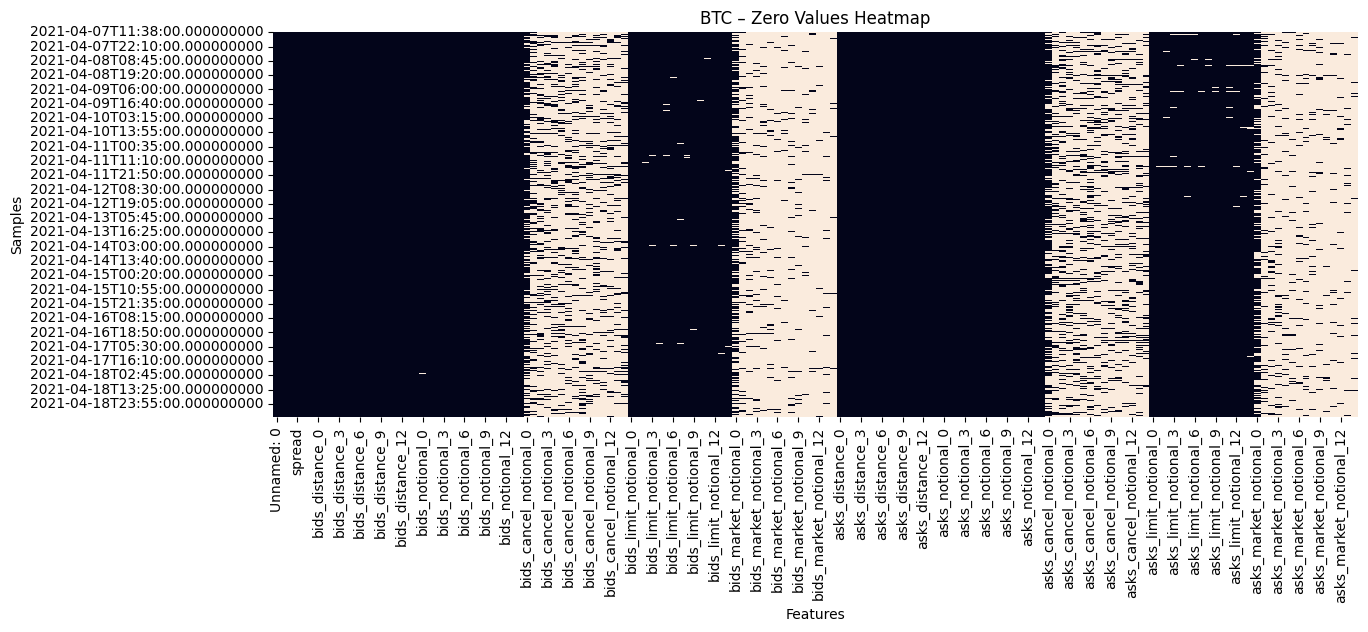

In [12]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.heatmap(btc == 0, cbar=False, ax=ax)
plt.title('BTC – Zero Values Heatmap')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()

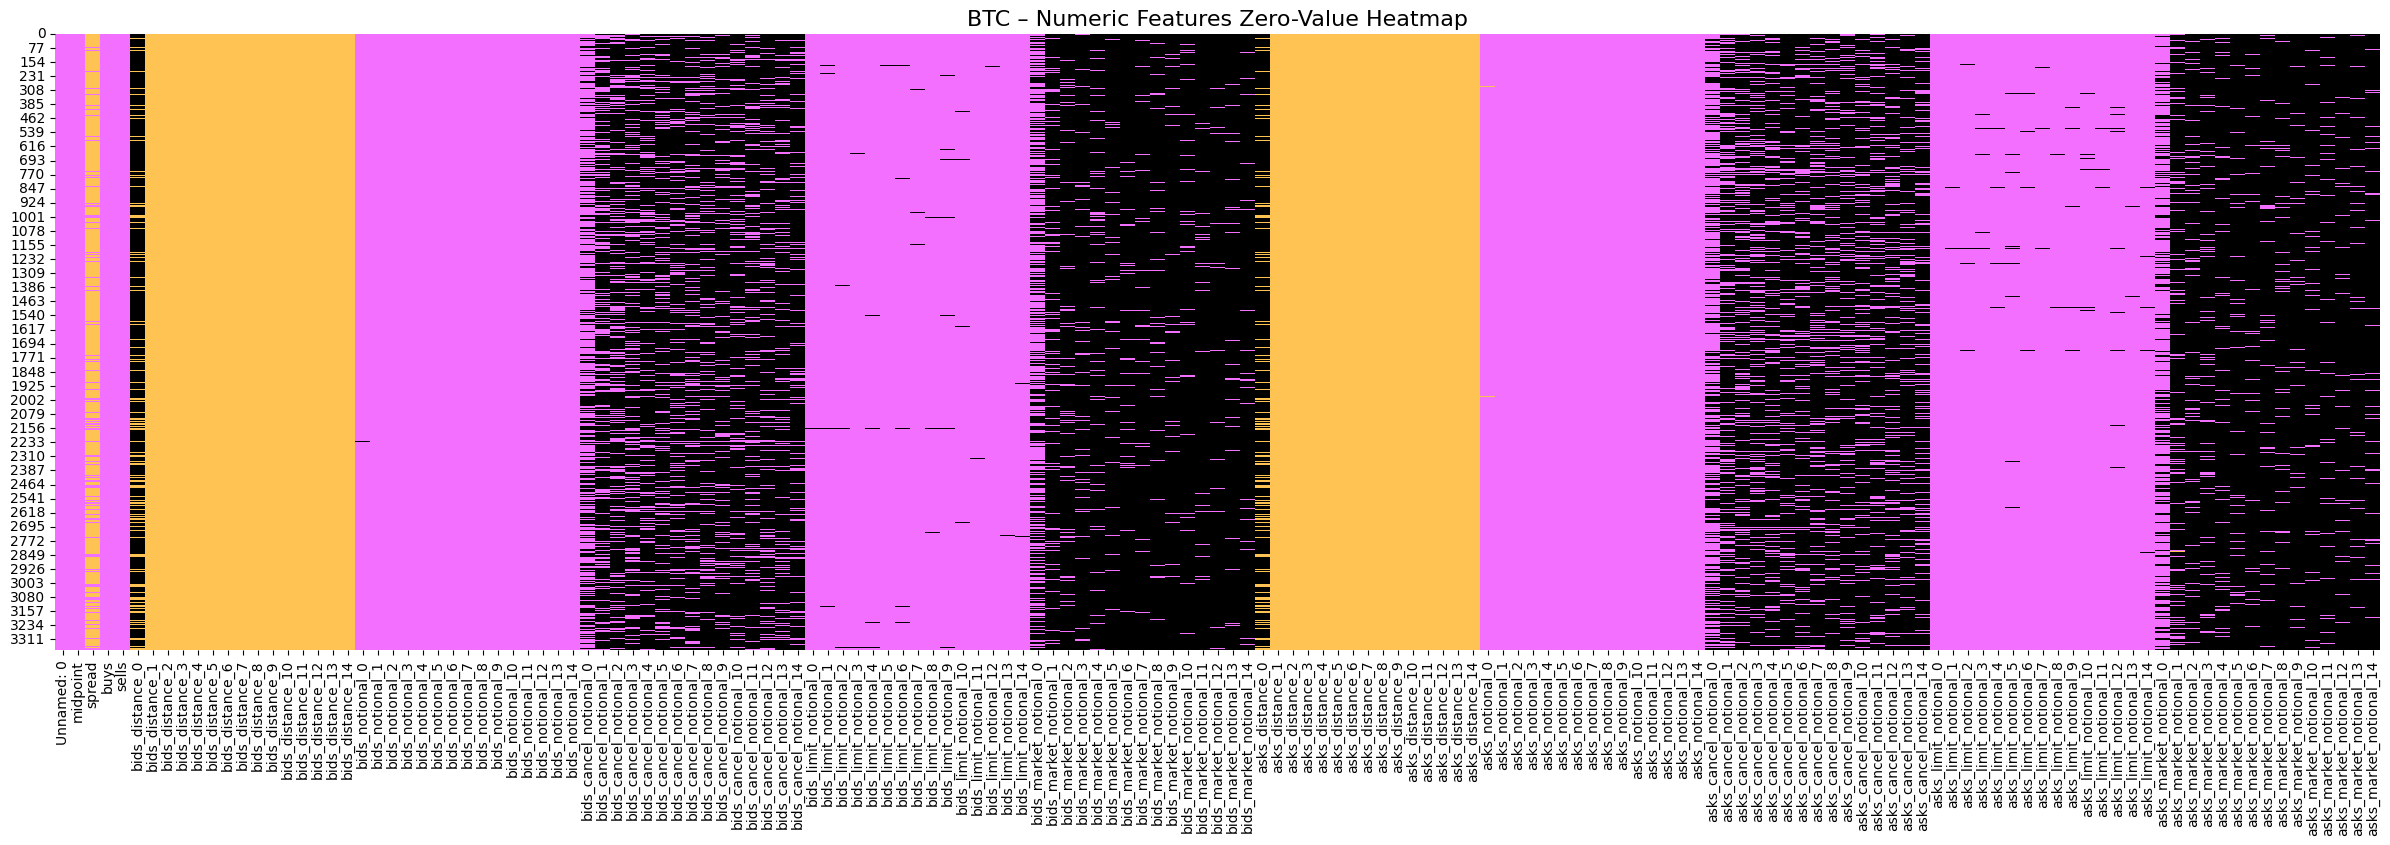

In [13]:
from matplotlib.colors import ListedColormap, BoundaryNorm

threshold_0 = 1e-7 
bins = np.array([threshold_0, 1.0])
data_abs = btc.select_dtypes(include=[np.number]).abs().values
categories = np.digitize(data_abs, bins)

cmap_colors = ["#000000",  # 0
               "#ffc353",  #  (0, 1]
               "#f36fff"]  #  > 1
cmap = ListedColormap(cmap_colors)
norm = BoundaryNorm([0, 1, 2, 3], cmap.N) 


fig, ax = plt.subplots(figsize=(30, 8))
sns.heatmap(categories, 
            cmap=cmap, 
            norm=norm, 
            cbar=False,  
            ax=ax,
            xticklabels=btc.select_dtypes(include=[np.number]).columns)

ax.set_title('BTC – Numeric Features Zero-Value Heatmap', fontsize=16)
plt.show()

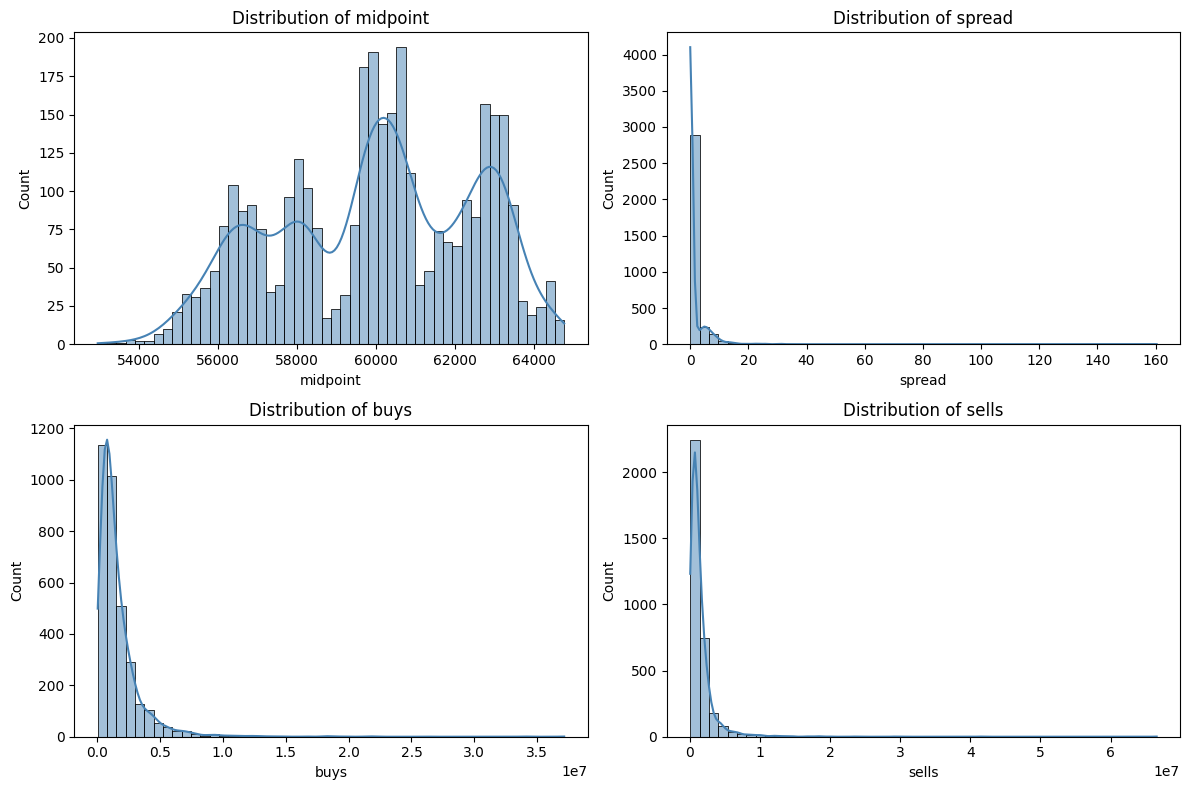

In [14]:
features_to_plot = ['midpoint', 'spread', 'buys', 'sells']

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, f in enumerate(features_to_plot):
    sns.histplot(btc[f], bins=50, ax=axs[i], kde=True, color='steelblue')
    axs[i].set_title(f'Distribution of {f}')

plt.tight_layout()
plt.show()

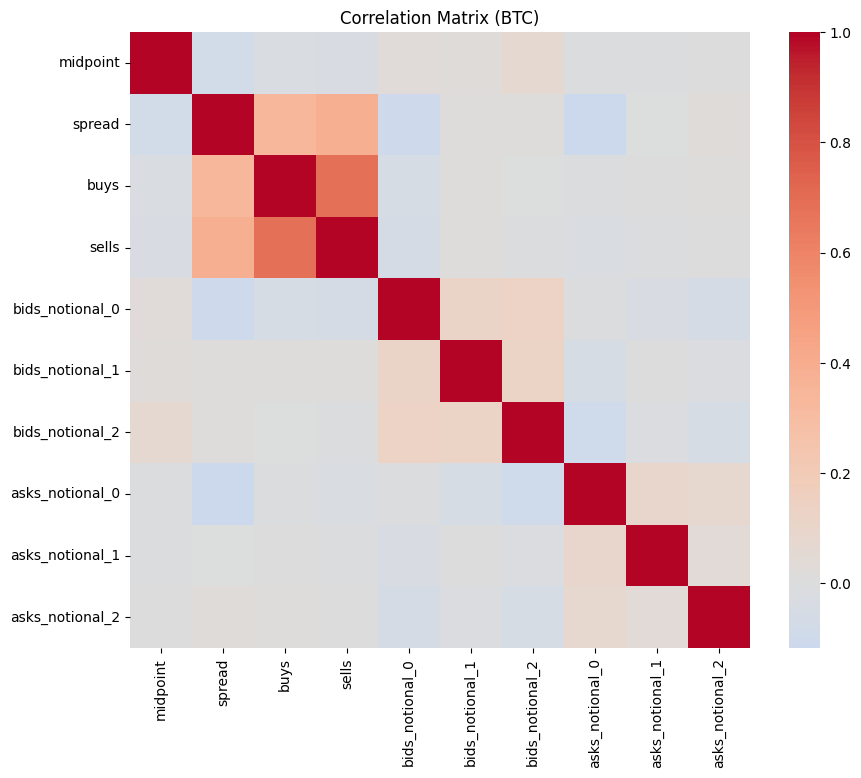

In [15]:
corr_features = ['midpoint', 'spread', 'buys', 'sells'] + \
                 [f'bids_notional_{i}' for i in range(3)] + \
                 [f'asks_notional_{i}' for i in range(3)]

corr = btc[corr_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix (BTC)')
plt.show()

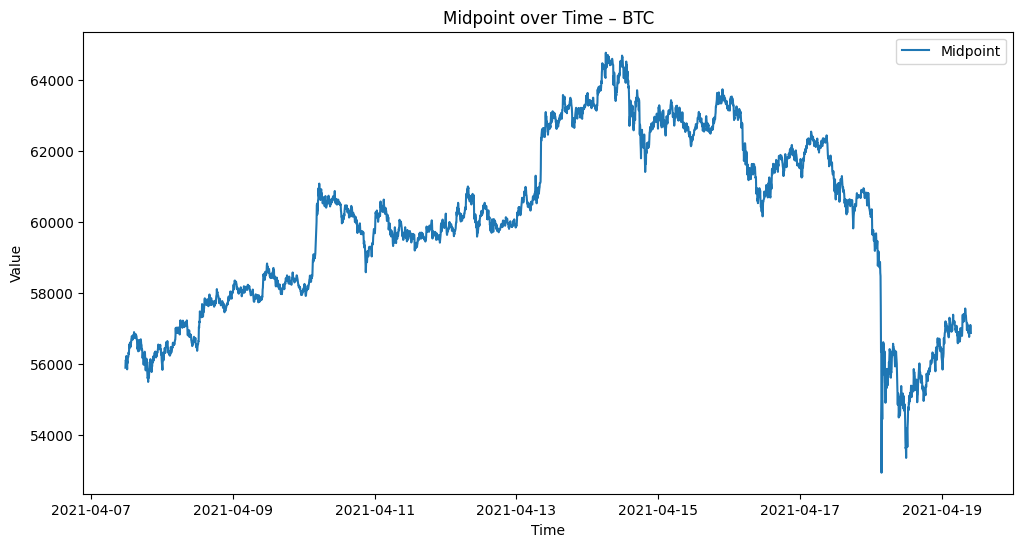

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(btc.index, btc['midpoint'], label='Midpoint', linewidth=1.5)
#plt.plot(btc.index, btc['bids_notional_0'], label='Bid Notional 0', linewidth=1, alpha=0.8)
#plt.plot(btc.index, btc['asks_notional_0'], label='Ask Notional 0', linewidth=1, alpha=0.8)
plt.legend()
plt.title('Midpoint over Time – BTC')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

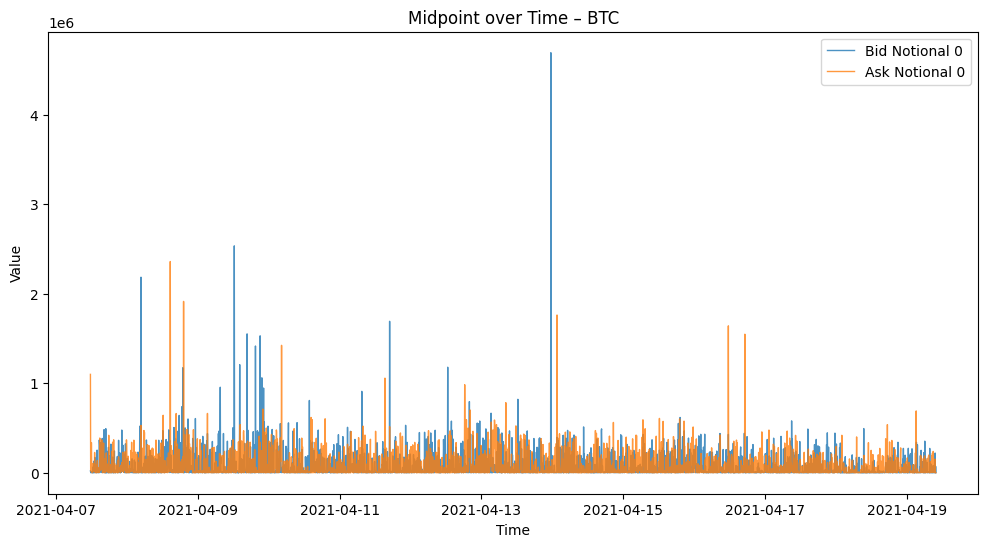

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(btc.index, btc['bids_notional_0'], label='Bid Notional 0', linewidth=1, alpha=0.8)
plt.plot(btc.index, btc['asks_notional_0'], label='Ask Notional 0', linewidth=1, alpha=0.8)
plt.legend()
plt.title('Midpoint over Time – BTC')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

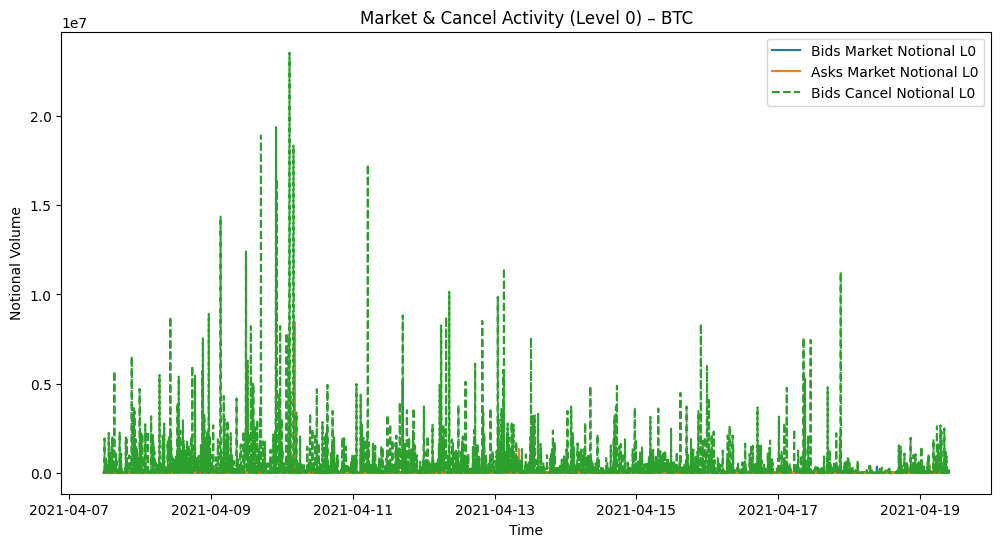

In [18]:

plt.figure(figsize=(12, 6))
plt.plot(btc.index, btc['bids_market_notional_0'], label='Bids Market Notional L0')
plt.plot(btc.index, btc['asks_market_notional_0'], label='Asks Market Notional L0')
plt.plot(btc.index, btc['bids_cancel_notional_0'], label='Bids Cancel Notional L0', linestyle='--')
plt.legend()
plt.title('Market & Cancel Activity (Level 0) – BTC')
plt.xlabel('Time')
plt.ylabel('Notional Volume')
plt.show()


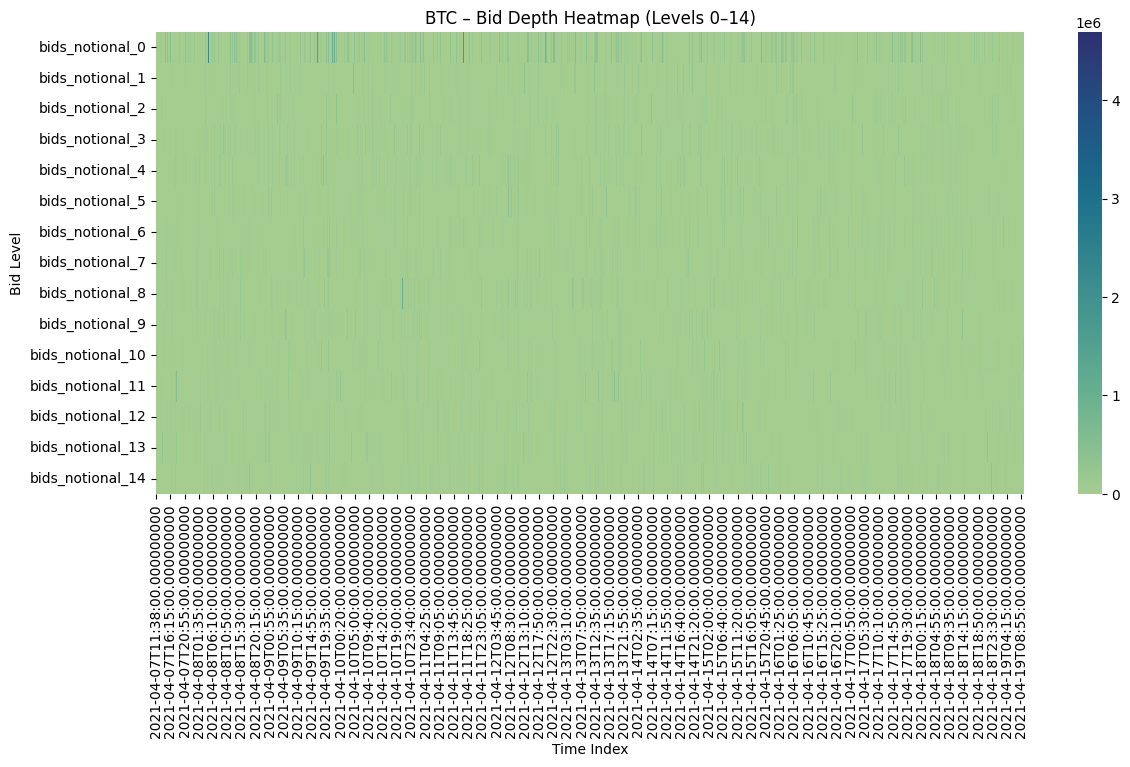

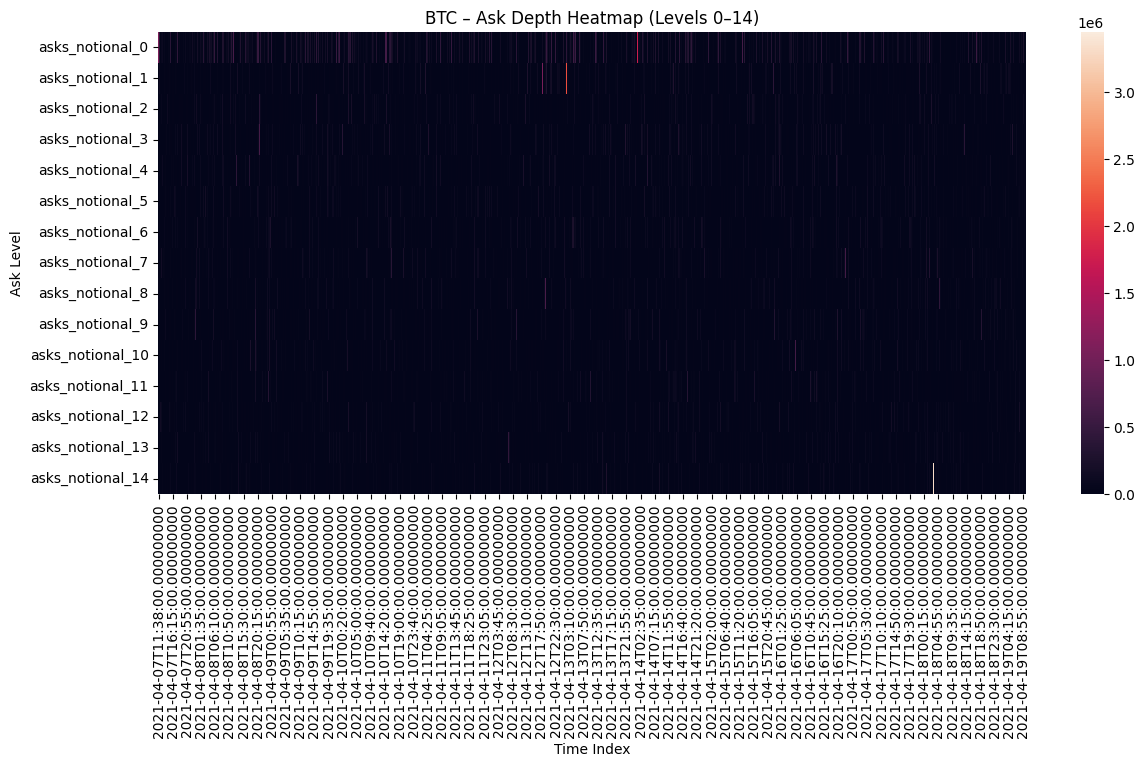

In [19]:
bid_levels = [f'bids_notional_{i}' for i in range(15)]
ask_levels = [f'asks_notional_{i}' for i in range(15)]

# Combine to 2D matrix
depth_data = pd.DataFrame({
    'timestamp': btc.index,
    **{lvl: btc[lvl] for lvl in bid_levels + ask_levels}
})

plt.figure(figsize=(14, 6))
sns.heatmap(depth_data[bid_levels].T, cmap='crest', cbar=True)
plt.title('BTC – Bid Depth Heatmap (Levels 0–14)')
plt.xlabel('Time Index')
plt.ylabel('Bid Level')
plt.show()

plt.figure(figsize=(14, 6))
sns.heatmap(depth_data[ask_levels].T, cmap='rocket', cbar=True)
plt.title('BTC – Ask Depth Heatmap (Levels 0–14)')
plt.xlabel('Time Index')
plt.ylabel('Ask Level')
plt.show()


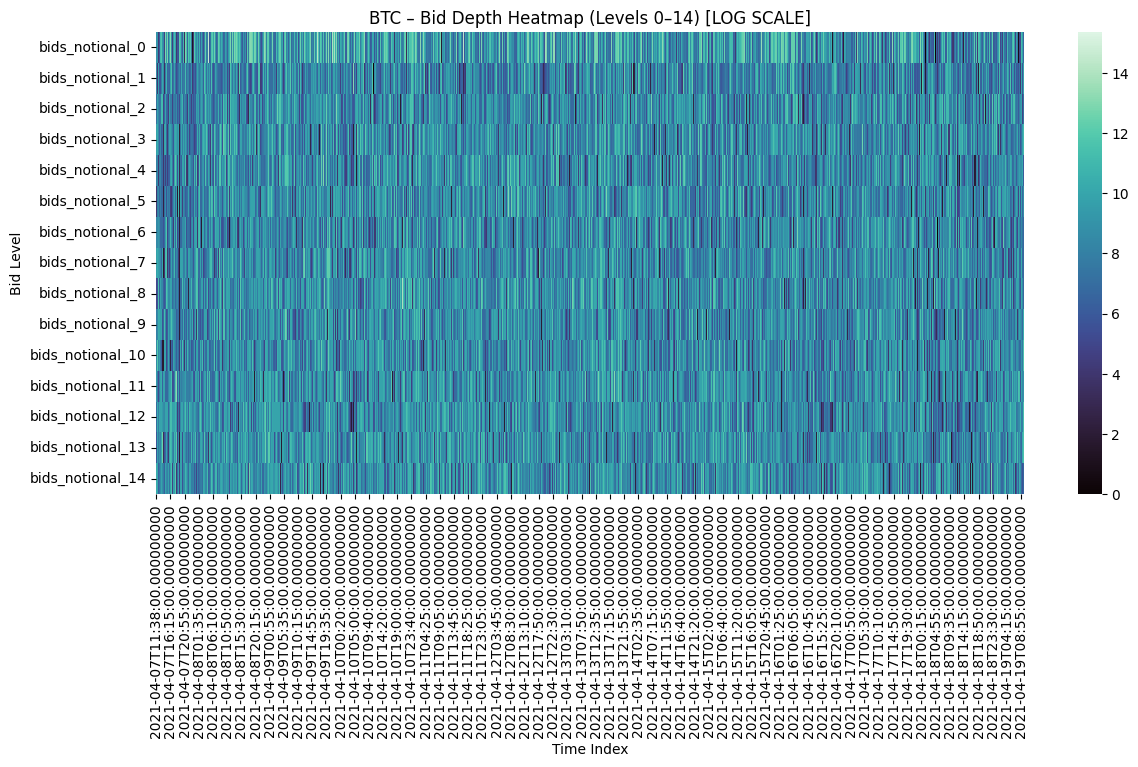

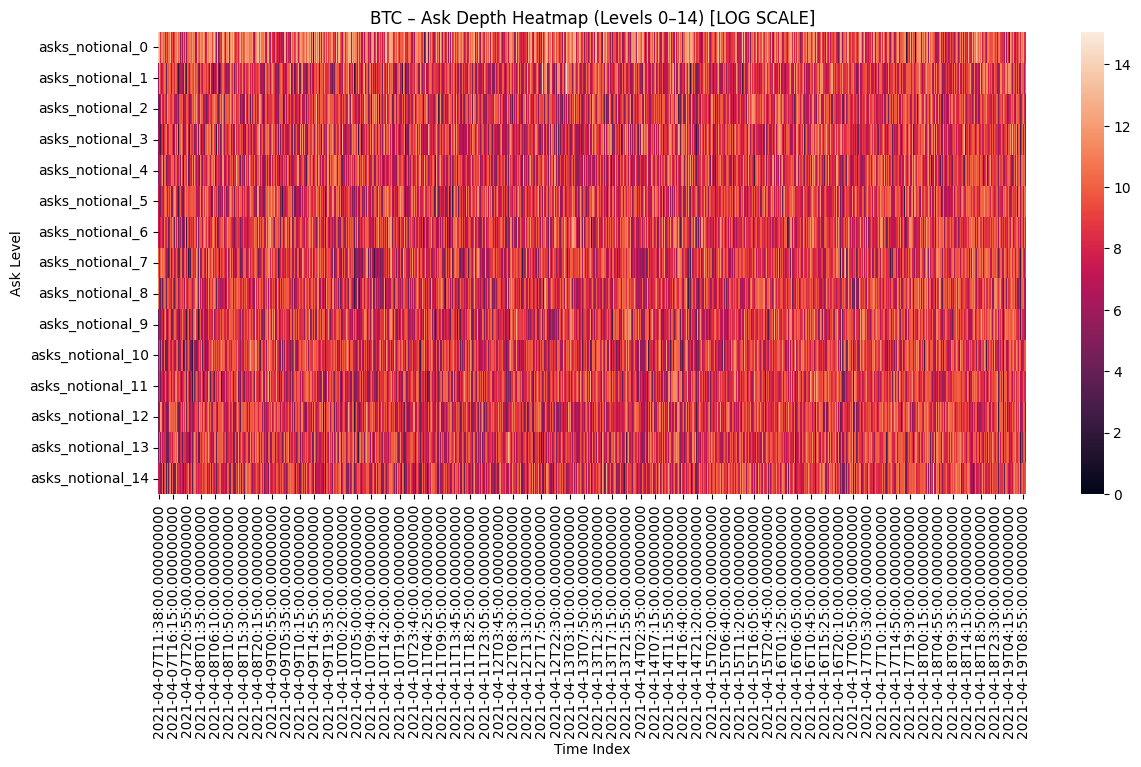

In [20]:
bid_levels = [f'bids_notional_{i}' for i in range(15)]
ask_levels = [f'asks_notional_{i}' for i in range(15)]

# Combine to 2D matrix
depth_data = pd.DataFrame({
    'timestamp': btc.index,
    **{lvl: btc[lvl] for lvl in bid_levels + ask_levels}
})

bid_data_log = np.log1p(depth_data[bid_levels].T)

plt.figure(figsize=(14, 6))
sns.heatmap(
    bid_data_log,
    cmap='mako', 
    cbar=True
)
plt.title('BTC – Bid Depth Heatmap (Levels 0–14) [LOG SCALE]')
plt.xlabel('Time Index')
plt.ylabel('Bid Level')
plt.show()

ask_data_log = np.log1p(depth_data[ask_levels].T)

plt.figure(figsize=(14, 6))
sns.heatmap(
    ask_data_log,
    cmap='rocket', 
    cbar=True
)
plt.title('BTC – Ask Depth Heatmap (Levels 0–14) [LOG SCALE]')
plt.xlabel('Time Index')
plt.ylabel('Ask Level')
plt.show()


In [27]:
btc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,3367.0,1.683000e+03,9.721135e+02,0.000000e+00,8.415000e+02,1.683000e+03,2.524500e+03,3.366000e+03
midpoint,3367.0,5.997197e+04,2.489093e+03,5.294711e+04,5.799005e+04,6.014886e+04,6.218803e+04,6.476024e+04
spread,3367.0,1.246264e+00,4.420446e+00,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.603600e+02
buys,3367.0,1.688951e+06,2.013268e+06,5.614640e+04,6.456963e+05,1.117926e+06,2.038281e+06,3.714443e+07
sells,3367.0,1.474376e+06,2.261480e+06,4.908544e+04,4.978045e+05,9.109207e+05,1.702583e+06,6.657600e+07
bids_distance_0,3367.0,-1.054158e-05,3.899856e-05,-1.472060e-03,-8.870682e-08,-8.382572e-08,-8.140652e-08,-7.730509e-08
bids_distance_1,3367.0,-4.684465e-05,6.483171e-05,-1.482892e-03,-6.852865e-05,-2.740744e-05,-2.962433e-06,-2.324015e-07
bids_distance_2,3367.0,-7.750682e-05,7.866929e-05,-1.596353e-03,-1.052456e-04,-6.075987e-05,-2.575945e-05,-3.873359e-07
bids_distance_3,3367.0,-1.037239e-04,8.829045e-05,-1.596537e-03,-1.392774e-04,-8.520328e-05,-4.352597e-05,-5.517329e-07
bids_distance_4,3367.0,-1.276456e-04,9.705702e-05,-1.624811e-03,-1.702924e-04,-1.079419e-04,-6.150354e-05,-9.176699e-07


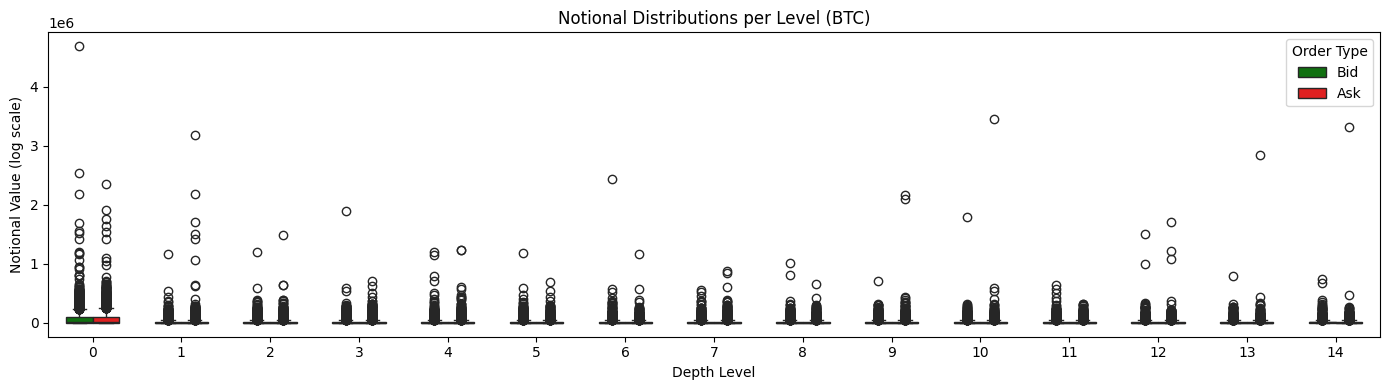

In [36]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(btc) * 2,
        'Type': ['Bid'] * len(btc) + ['Ask'] * len(btc),
        'Value': pd.concat([btc[f'bids_notional_{i}'], btc[f'asks_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)
#plt.yscale('log') 
plt.title('Notional Distributions per Level (BTC)')
plt.xlabel('Depth Level')
plt.ylabel('Notional Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

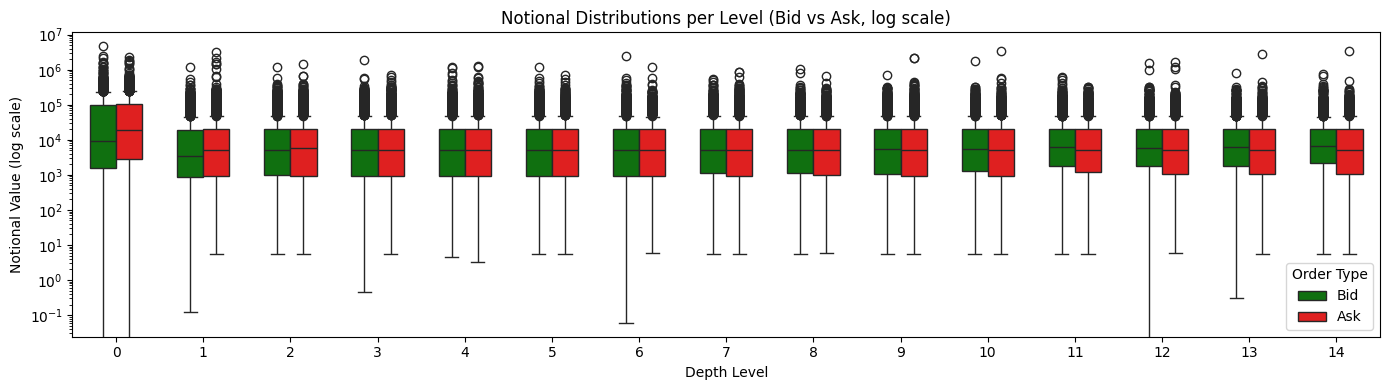

In [37]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(btc) * 2,
        'Type': ['Bid'] * len(btc) + ['Ask'] * len(btc),
        'Value': pd.concat([btc[f'bids_notional_{i}'], btc[f'asks_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

plt.yscale('log')  # Option 2: scale axis
plt.title('Notional Distributions per Level (Bid vs Ask, log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Notional Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

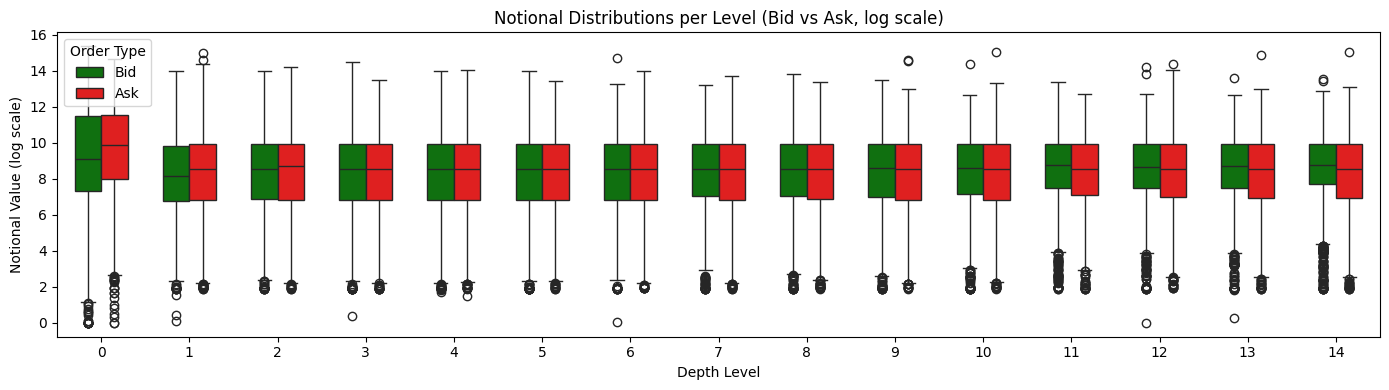

In [38]:
df_box_all['Value'] = np.log1p(df_box_all['Value'])

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

plt.title('Notional Distributions per Level (Bid vs Ask, log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Notional Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

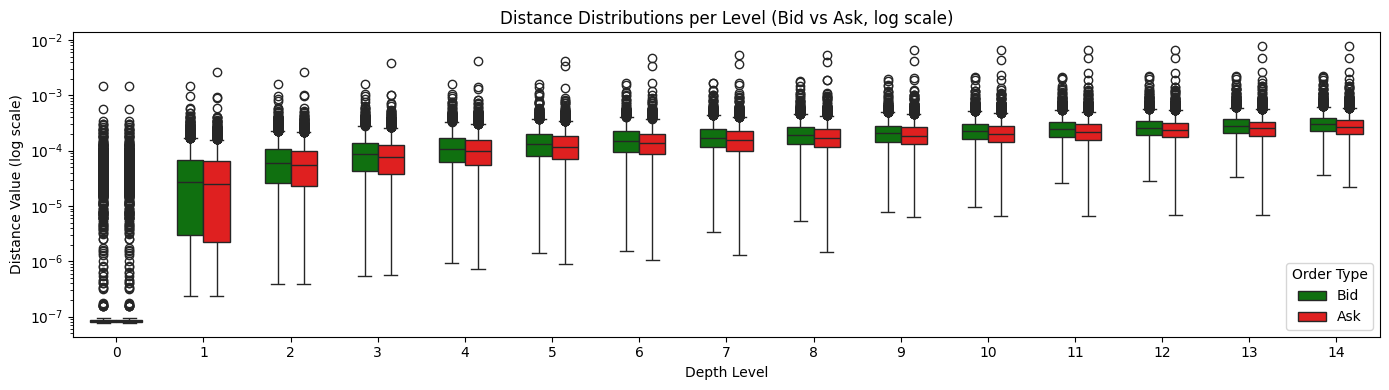

In [ ]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(btc) * 2,
        'Type': ['Bid'] * len(btc) + ['Ask'] * len(btc),
        'Value': pd.concat([btc[f'bids_distance_{i}']*(-1), btc[f'asks_distance_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

plt.yscale('log') 
plt.title('Distance Distributions per Level (Bid vs Ask, log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Distance Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

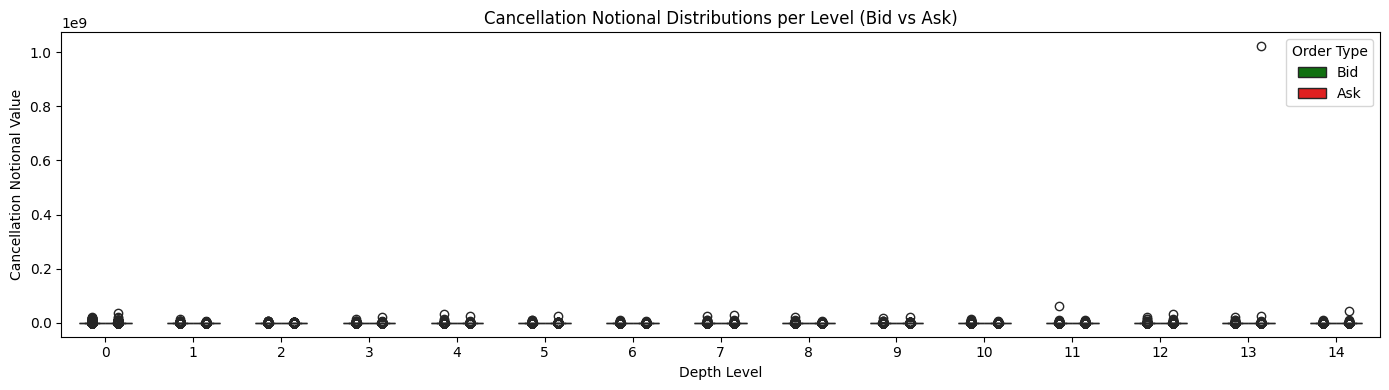

In [46]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(btc) * 2,
        'Type': ['Bid'] * len(btc) + ['Ask'] * len(btc),
        'Value': pd.concat([btc[f'bids_cancel_notional_{i}'], btc[f'asks_cancel_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

#plt.yscale('log') 
plt.title('Cancellation Notional Distributions per Level (Bid vs Ask)')
plt.xlabel('Depth Level')
plt.ylabel('Cancellation Notional Value')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

In [53]:
df_box_all[df_box_all['Value'] >= max(df_box_all['Value']*0.30)]

,Level,Type,Value
92406,13,Ask,1.021637e+09


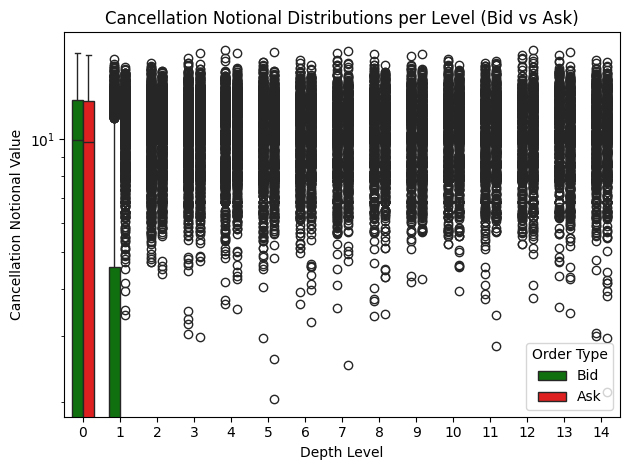

In [57]:
df_box_all= df_box_all[df_box_all['Value'] < max(df_box_all['Value'])]
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

plt.yscale('log') 
plt.title('Cancellation Notional Distributions per Level (Bid vs Ask)')
plt.xlabel('Depth Level')
plt.ylabel('Cancellation Notional Value')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

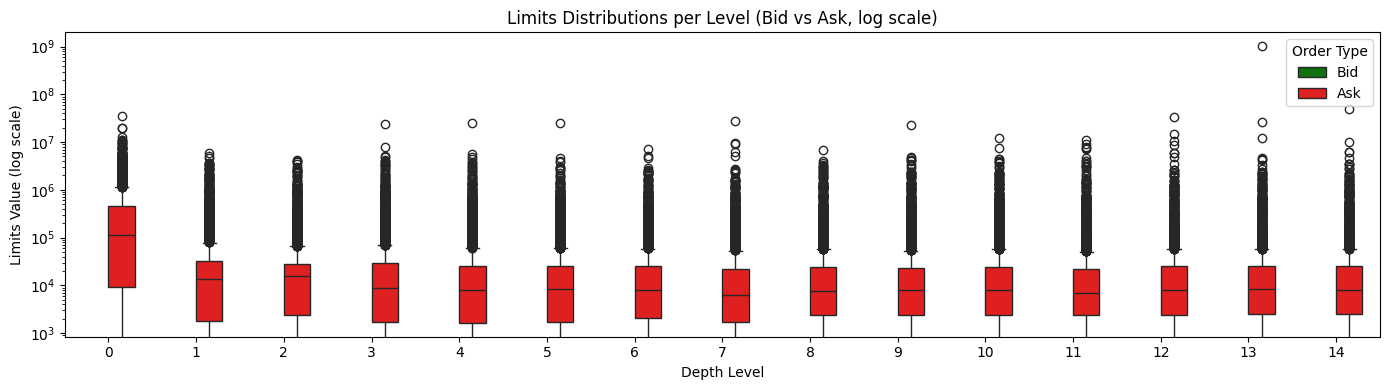

In [61]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(btc) * 2,
        'Type': ['Bid'] * len(btc) + ['Ask'] * len(btc),
        'Value': pd.concat([btc[f'bids_limit_notional_{i}']*(-1), btc[f'asks_limit_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

plt.yscale('log') 
plt.title('Limits Distributions per Level (Bid vs Ask, log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Limits Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

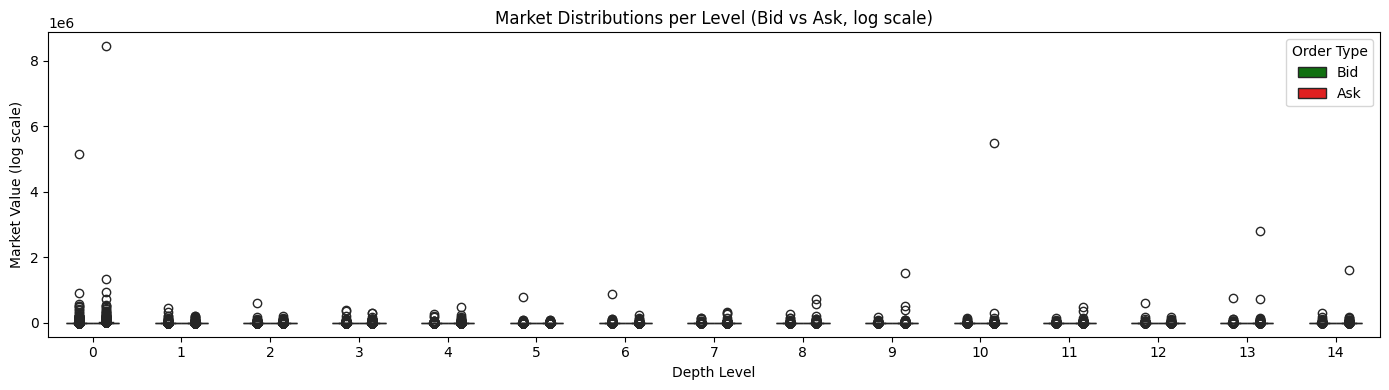

In [77]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(btc) * 2,
        'Type': ['Bid'] * len(btc) + ['Ask'] * len(btc),
        'Value': pd.concat([btc[f'bids_market_notional_{i}'], btc[f'asks_market_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

#plt.yscale('log') 
plt.title('Market Distributions per Level (Bid vs Ask, log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Market Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

In [78]:
df_box_all[df_box_all['Value'] >= max(df_box_all['Value']*0.30)]

,Level,Type,Value
1192,0,Bid,5142645.00
4129,0,Ask,8437112.00
72380,10,Ask,5484520.50
92273,13,Ask,2789501.25


In [79]:
df_box_all= df_box_all[df_box_all['Value'] < max(df_box_all['Value']*0.30)]


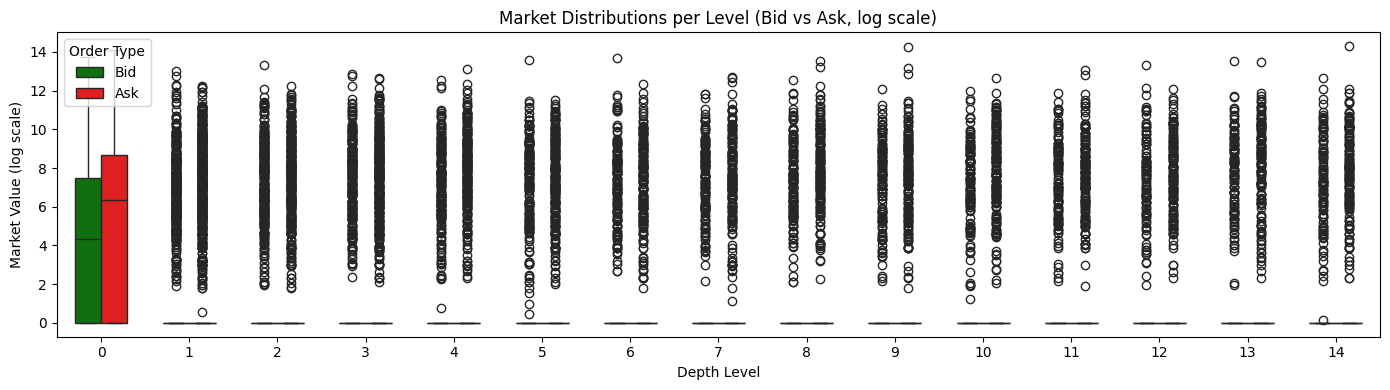

In [82]:
df_box_all['Value'] = np.log1p(df_box_all['Value'])

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

#plt.yscale('log') 
plt.title('Market Distributions per Level (Bid vs Ask, log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Market Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()